# Password, Hashing, and Salt

The purpose of this notebook is to document the basics of salting and hashing passwords.

# Basic Unix Protocol

The point of salting passwords is to make it impossible to reverse the hashes by using rainbow tables.

The basic protocol is:

1. User provides plaintext username and password.
2. System retrieves the user's salt from its file system
3. System hashes `salt + password`
4. System compares computed and stored hash of salted password

# Storage of Hashes and Salts

Per Wikipedia's https://en.wikipedia.org/wiki/Salt_(cryptography), file `/etc/passwd` was used to store salts in plaintext as well as the hashes of salted passwords (1970s-1980).

Starting in 1980, Unix started using the shadown password system.

## Password File (`/etc/passwd`)

**Important:** Password hashes and salts are not stored in `/etc/passwd` in modern Unix-style operating systems.  Typically, this file is readable by all users by modifiable only by the system's admin.

This file has one record per line.  Here is an example from my own computer.

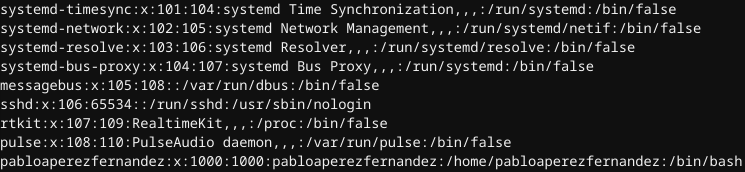

My own record is (with newlines inserted after every colon):

```
pabloaperezfernandez:
x:
1000:
1000:
pabloaperezfernandez:
/home/pabloaperezfernandez:
/bin/bash
```

and the seven colon-separated fields are:
1. `pabloaperezfernandez` - username
2. `x` - Can also be`*` to indicate the user's account is disabled
3. `1000` - user ID (used internally by the system)
4. `1000` - group ID
5. `pabloaperezfernandez` - Gecos field AKA comma-separated values of information about the user, such as full name and contact details
6. `/home/pabloaperezfernandez` - User's home directory
7. `/bin/bash`` - Program that runs every time the user logs in.  This is usually a shell

## Shadow File

This files stores sensitive information, and its access is restricted to administrators with the highest access rights. This password system is used in conjunction with `/etc/passwd`.

1. User login name
2. salt and hashed password OR a status exception value e.g.:
    - "\\$id\\$salt\\$hashed", the printable form of a password hash as produced by crypt (C), where "\\$id" is the algorithm used. Other Unix-like systems may have different values, like NetBSD. Key stretching is used to increase password cracking difficulty, using by default 1000 rounds of modified MD5,[4] 64 rounds of Blowfish, 5000 rounds of SHA-256 or SHA-512.[5] The number of rounds may be varied for Blowfish, or for SHA-256 and SHA-512 by using "\\$A\\$rounds=X\\$", where "A" and "X" are the algorithm IDs and the number of rounds.
        - \\$1\\$ – MD5
        - \\$2a\\$ – Blowfish
        - \\$2y\\$ – Eksblowfish
        - \\$5\\$ – SHA-256
        - \\$6\\$ – SHA-512
    - Empty string – No password, the account has no password (reported by passwd on Solaris with "NP").[6]
    - "!", "*" – the account is password locked, user will be unable to log in via password authentication but other methods (e.g. ssh key, logging in as root) may be still allowed.[7]
    - "*LK*" – the account itself is locked, user will be unable to log in.[7]
    - "*NP*", "!!" – the password has never been set[8]
3. Days since epoch of last password change
4. Days until change allowed
5. Days before change required
6. Days warning for expiration
7. Days after no logins before account is locked
8. Days since epoch when account expires
9. Reserved and unused

**Source:** TechnologyNotes/WebAuthentication/Passwords, Hashing, and Salt.ipynb